In [1]:
cd ..

/Users/Mason/Desktop/Columbia/computational-methods-in-finance/cfinance-filtering


In [2]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt

from filtering.utils import simulate as sim
from filtering.filtering import particle_filter as pf
from importlib import reload

In [3]:
reload(sim)

<module 'filtering.utils.simulate' from '/Users/Mason/Desktop/Columbia/computational-methods-in-finance/cfinance-filtering/filtering/utils/simulate.py'>

In [4]:
S0 = 100
mu = 0.02
kappa = 3.5 # mean reversion rate
theta = 0.05
sigma = 0.1308
nu = 0.0726
eta = 4 # long-term rate of change
lda = 8 # time change vol

T = 1
N = 200
dt = T/N

In [5]:
vgsa_params = [mu, kappa, theta, sigma, nu, eta, lda]

In [6]:
y, jumps = sim.simulate_vgsa(vgsa_params, S0, N=N, dt=dt)

/Users/Mason/Desktop/Columbia/computational-methods-in-finance/cfinance-filtering/filtering/utils/simulate.py:126: ComplexWarning: Casting complex values to real discards the imaginary part
  logs[i] = sj


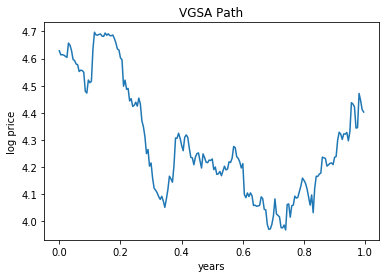

In [7]:
years = np.arange(N)*dt
plt.plot(years, y[1:])
plt.title('VGSA Path')
plt.xlabel('years')
plt.ylabel('log price')
plt.savefig('./report/figs/sim_vgsa_path')
plt.show()

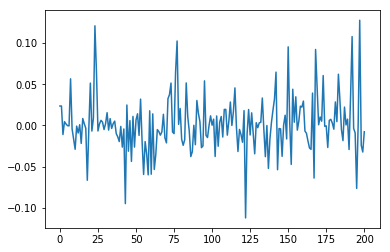

In [9]:
plt.plot(jumps)
plt.show()

In [10]:
reload(pf)

<module 'filtering.filtering.particle_filter' from '/Users/Mason/Desktop/Columbia/computational-methods-in-finance/cfinance-filtering/filtering/filtering/particle_filter.py'>

In [11]:
num_particles = 2000
pf_vgsa = pf.PFVGSA(N=num_particles, dt=dt)

In [12]:
vgsa_params

[0.02, 3.5, 0.05, 0.1308, 0.0726, 4, 8]

In [13]:
mu_ = (0.01, 0.05)
kappa_ = (2, 4) # mean reversion rate
theta_ = (0.01, 0.1)
sigma_ = (0.1, 0.2)
nu_ = (0.02, 0.1)
eta_ = (3,6) # long-term rate of change
lda_ = (6,10) # time change vol

In [14]:
vgsa_params_bounds = [mu_, kappa_, theta_, sigma_, nu_, eta_, lda_]

### Filtering by using arrival rate as (hidden) state

In [15]:
log_return = y[1:]/y[:-1]

In [16]:
arrivals, param_steps = pf_vgsa.filter_arrival(log_return, vgsa_params_bounds, is_bounds=True)

resampling since: 1.0540080656935773
resampling since: 1.0065666336702288
num neg. arrival rate: 15
resampling since: 1.3187441697111755
num neg. arrival rate: 86
resampling since: 2.989536553585753
num neg. arrival rate: 61
resampling since: 139.15018974544734
num neg. arrival rate: 230
resampling since: 47.110657642955125
num neg. arrival rate: 73
resampling since: 29.800463158863543
num neg. arrival rate: 129
resampling since: 7.135939405668868
num neg. arrival rate: 92
resampling since: 66.85440529132951
num neg. arrival rate: 171
resampling since: 15.534705683100869
num neg. arrival rate: 106
resampling since: 6.482067239284453
num neg. arrival rate: 81
resampling since: 96.46857740385991
num neg. arrival rate: 176
resampling since: 1.1608007628091401
num neg. arrival rate: 12
resampling since: 115.83780017040546
num neg. arrival rate: 305
resampling since: 20.214472850611862
num neg. arrival rate: 78
resampling since: 19.351717568302643
num neg. arrival rate: 137
resampling since

resampling since: 36.71354848012593
num neg. arrival rate: 143
resampling since: 3.6205614885704964
num neg. arrival rate: 64
resampling since: 6.725124212794321
num neg. arrival rate: 110
resampling since: 7.285032150900157
num neg. arrival rate: 122
resampling since: 31.301023188398272
num neg. arrival rate: 145
resampling since: 11.507839968274306
num neg. arrival rate: 89
resampling since: 33.01089015040422
num neg. arrival rate: 118
resampling since: 22.923110184481185
num neg. arrival rate: 134
resampling since: 41.82522353079274
num neg. arrival rate: 128
resampling since: 34.66696683827024
num neg. arrival rate: 112
resampling since: 38.05893682586509
num neg. arrival rate: 157
resampling since: 28.956229543403776
num neg. arrival rate: 133
resampling since: 24.533359979136755
num neg. arrival rate: 111
resampling since: 64.02845852557935
num neg. arrival rate: 143
resampling since: 47.66858211816302
num neg. arrival rate: 156
resampling since: 22.27596930647654
num neg. arriva

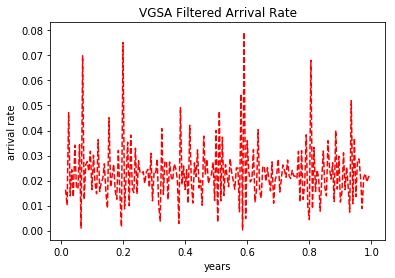

In [23]:
years = np.arange(N)*dt
plt.plot(years[3:], arrivals[3:], 'r--')
plt.title('VGSA Filtered Arrival Rate')
plt.xlabel('years')
plt.ylabel('arrival rate')
# plt.plot(vol, 'b--')
plt.savefig('./report/figs/')
plt.show()

In [21]:
vgsa_params

[0.02, 3.5, 0.05, 0.1308, 0.0726, 4, 8]

In [23]:
param_steps.transpose()[-1]

array([0.01027549, 2.37428332, 0.09912834, 0.18757907, 0.09810529,
       5.47265739, 7.98766773])

# Plot parameter convergence

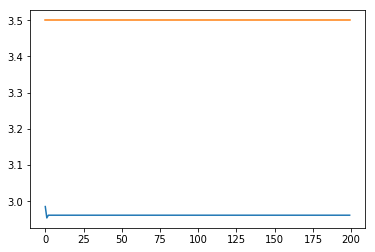

In [27]:
plt.plot(param_steps[1])
plt.plot(np.ones(len(param_steps[1]))*vgsa_params[1])
plt.show()

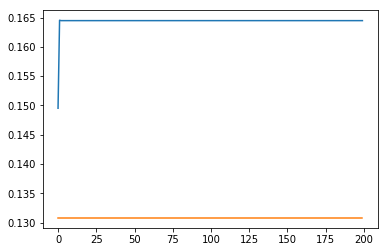

In [28]:
plt.plot(param_steps[3])
plt.plot(np.ones(len(param_steps[3]))*vgsa_params[3])
plt.show()